# Character-Level Text Generation Using RNN

**Objective:**
The goal of this project is to build a character-level Recurrent Neural Network (RNN) capable of generating text in the style of William Shakespeare. The model is trained on a dataset of Shakespeare's works, learning to predict the next character in a sequence, and can be used to generate new, coherent text sequences.

**Dataset:**
The dataset consists of the complete works of Shakespeare, obtained from a public domain source. It is loaded and processed into a format suitable for training a character-level RNN.

**Methodology:**
1. **Data Preprocessing:**
   - The text is vectorized by mapping each unique character to an integer index.
   - Input sequences of fixed length (e.g., 100 characters) are created, with each sequence paired with the corresponding target sequence (i.e., the next character in the text).

2. **Model Architecture:**
   - An embedding layer is used to convert character indices into dense vectors of a fixed size.
   - A GRU (Gated Recurrent Unit) layer with 1024 units is employed to capture temporal dependencies in the sequence data.
   - The output layer is a Dense layer that outputs logits corresponding to the probability distribution over all possible characters.

3. **Training:**
   - The model is trained using categorical cross-entropy loss, with the Adam optimizer.
   - Checkpoints are saved after each epoch to allow for the resumption of training and model evaluation at various stages.

4. **Text Generation:**
   - After training, the model is used to generate text by predicting the next character in a sequence given an initial input string.
   - The generation process involves sampling from the probability distribution of the next character, iteratively producing a text sequence.

**Results:**
The trained model can generate text that mimics the style of Shakespeare, producing coherent and contextually relevant passages. The quality of the generated text improves with more epochs of training, though it may still contain some non-sensical or repetitive phrases typical of character-level models.

**Conclusion:**
This project demonstrates the effectiveness of RNNs in sequence modeling tasks such as text generation. While the generated text captures the essence of Shakespeare's style, further improvements could involve using more advanced architectures like LSTM or Transformer models and experimenting with hyperparameters or training techniques to enhance the coherence and creativity of the generated text.


### GRU-Based RNN Architecture for Character-Level Text Generation

This image represents the architecture of a Recurrent Neural Network (RNN) using Gated Recurrent Units (GRUs) for character-level text generation. Here's a breakdown of the components:

1. **Input Characters (`Input Char`)**:
   - The model receives sequences of characters as input. Each character is represented by an index in a vocabulary.

2. **Embedding Layer**:
   - The input characters are passed through an embedding layer. This layer converts the character indices into dense vectors of a fixed size (`EMBEDDING_SIZE`). The embeddings capture semantic meaning and are learnable parameters of the model.

3. **GRU Layers**:
   - The embeddings are then passed through a series of GRU layers. GRUs are a type of RNN that are designed to handle sequential data and can maintain information across time steps. Each GRU cell takes the current embedding and the previous hidden state (`State Before`) to produce a new hidden state (`GRU Output`) and update the state (`State After`).
   - The GRU outputs are sequences of hidden states, each corresponding to a time step in the input sequence.

4. **Dense Layer**:
   - The outputs from the GRU layers are then passed through a dense layer. This layer is fully connected and transforms the GRU outputs into logits. The logits are raw prediction scores for each character in the vocabulary.

5. **Logits**:
   - Finally, the logits are used to predict the next character in the sequence. The model will generate a probability distribution over all possible characters, from which the next character is sampled or selected.

6. **State Before/After**:
   - The state before represents the hidden state that is passed into the GRU cell, while the state after represents the updated hidden state after processing the input character. This state carries information from one time step to the next, allowing the model to maintain context.



In [5]:
import tensorflow as tf
import numpy as np
import os
import time

# Download the Shakespeare dataset
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Read the dataset
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
print(f'Length of text: {len(text)} characters')

# View the first 250 characters in the text
print(text[:250])

# Create character index
vocab = sorted(set(text))
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# Text vectorization
text_as_int = np.array([char2idx[c] for c in text])

# Set training parameters
seq_length = 100
examples_per_epoch = len(text) // seq_length

# Create input and output samples
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Batching datasets
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)


vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)),
        tf.keras.layers.GRU(rnn_units, return_sequences=True, recurrent_initializer='glorot_uniform'), 
        tf.keras.layers.Dense(vocab_size)
    ])
    return model


model = build_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)

# Define the loss function
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)


model.summary()

# Check the shape of the input sample
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

# Configure training checkpoints
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")  # Add the end of .weights.h5
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)


Length of text: 1115394 characters
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, None, 256)      │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, None, 1024)     │     3,938,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, None, 65)       │        66,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,021,569 (15.34 MB)

 Trainable params: 4,021,569 (15.34 MB)

 Non-trainable params: 0 (0.00 B)

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


2024-09-03 12:41:39.449504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 119s 685ms/step - loss: 3.0782
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 121s 701ms/step - loss: 1.9123
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 122s 706ms/step - loss: 1.6313
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 127s 733ms/step - loss: 1.4800
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 129s 746ms/step - loss: 1.3934
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 129s 747ms/step - loss: 1.3233
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 128s 742ms/step - loss: 1.2796
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 127s 730ms/step - loss: 1.2328
Epoch 9/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 126s 730ms/step - loss: 1.1872
Epoch 10/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 129s 745ms/step - loss: 1.1451


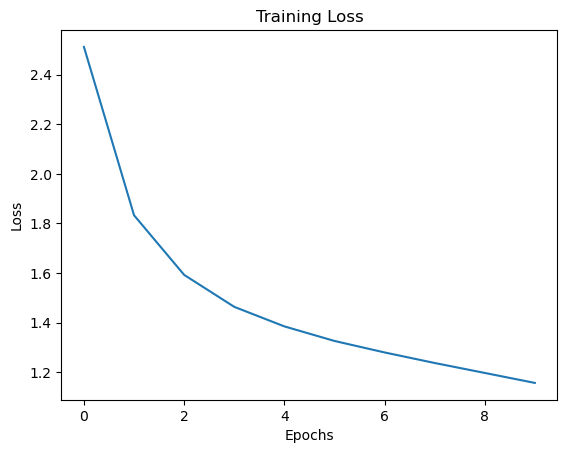

In [6]:
import matplotlib.pyplot as plt

# Train the model and record the losses
EPOCHS = 10
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

# Visualize training losses
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [15]:

print(os.listdir(checkpoint_dir))


['ckpt_7.weights.h5', 'ckpt_2.weights.h5', 'ckpt_8.weights.h5', 'ckpt_5.weights.h5', 'ckpt_3.weights.h5', 'ckpt_6.weights.h5', 'ckpt_1.weights.h5', 'ckpt_10.weights.h5', 'ckpt_9.weights.h5', 'ckpt_4.weights.h5']


In [14]:
import tensorflow as tf
import numpy as np
import os
import time
from IPython.display import clear_output, display

# Text generation functions
def generate_text(model, start_string):
    num_generate = 1000

    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []

    temperature = 1.0



    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    
        display(start_string + ''.join(text_generated))
        clear_output(wait=True)
        time.sleep(0.05)

    return (start_string + ''.join(text_generated))


model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

# Select the latest checkpoint file path
checkpoint_path = os.path.join(checkpoint_dir, 'ckpt_10.weights.h5')

# Load checkpoint weights
model.load_weights(checkpoint_path)

# Generate and dynamically display text
generated_text = generate_text(model, start_string=u"Shakespear")
print(generated_text)


Shakespear than maill amathyomer the THere mowitheve d gusth Lewh mowan as s blil aver lmy igl brdyou hineron: thavires yon kelarstofune.
Mar ouryonyspotryo
APdinus iomy me tior MI he I iexout id d cugatheere-prinLE
UPDy,
K:
Hapr iver:
Tige br wano te?
HOR3
ALAn'
TIO themy whinew, ke.
NG.
F g boro:
SChamo hallod mishe o hy chergho blevene futher y s toungopounevitreas he warat oo smofuriny:
ARE thesoutas br IChathin dengesiure? E owit pry:
CKeno,
CAWe he yow f.
AUT apes, as, bo coug aligr hed Yodukee Ore, s aiswak.
Tor:
ERIOWhour'd athe
BAmoulldille t
Burs s lerts Be
Ty, p, ande RUpinfot R3 or:
Be hapualy thal y sh wo I ore?
ANINRIt, yo t me:
Wh ghincoureprt booreranel winorat d y,
G untiblin ufabt!
Houk't urdasomyountor arar.
TBRCAtht ng mer horshe I w'e
Anchokn al$alod memetw, ce brailay wad ilI I Lughesc.
RO:
D

An tacove blds w, hthyomeve wiopllbonod, ten wis tia:
TZallut bes, hing s mared RCK: fowTo g:
A ORDO uthouca dechape abel this ave g t I.
TUS:
Anbemedourealin:
LA:
RISce tal

### Analysis of the Generated Text


1. **Presence of English-like Words**:
   - The generated text contains fragments and words that resemble English, such as "Shakespear," "THere," "Mar," and "IChathin." This indicates that the model has learned some patterns from the training data and is able to produce character sequences that vaguely resemble English words.
   - However, these words often appear incomplete or nonsensical, suggesting that the model struggles to fully capture the correct spelling and structure of words.

2. **Randomness and Lack of Coherence**:
   - The text lacks coherence and meaningful content. The sequence of characters and words does not form any meaningful sentences or phrases, and there are many instances of random, unstructured character combinations like "thavires yon kelarstofune" and "SChamo hallod mishe."
   - This randomness is partly due to the model's attempt to balance creativity and coherence, but it seems the model is leaning too much towards randomness in this case.

3. **Repetition of Character Combinations**:
   - There are instances where certain character combinations, like "iomy," "kelar," and "warat," are repeated or appear similar in structure. This might indicate that the model has learned some recurring patterns from the data but is overfitting to those patterns without understanding their context or meaning.

4. **Symbols and Numbers**:
   - The presence of symbols like ":", "3", and capital letters in seemingly random places suggests that the model is still learning where and how to appropriately use punctuation and capitalization. It also indicates that the model might be incorporating rare or less frequent patterns that it encountered during training.

5. **Structural Issues**:
   - The text generated does not follow any recognizable structure of prose or verse, which is particularly noticeable given that Shakespeare's works often follow strict metrical patterns (like iambic pentameter). The generated text lacks this rhythmic structure, indicating that the model has not yet learned these complex linguistic features.

### Reasons for These Results:

1. **Model Complexity**:
   - The GRU-based model, while effective at capturing some sequential patterns, may not be complex enough to capture the intricacies of English grammar, syntax, and poetic structure. More advanced models, such as those based on LSTM or Transformer architectures, might perform better.

2. **Training Duration**:
   - The model may not have been trained for long enough or on a sufficiently large dataset. More extensive training with more data could help the model learn better representations of the language.

3. **Temperature Setting**:
   - The temperature setting was 1.0, which allows for high variability in predictions. Lowering the temperature might result in more coherent and predictable outputs, though at the risk of reducing creativity.

### Recommendations:

1. **Further Training**:
   - Consider training the model for additional epochs to allow it more time to learn from the data. This could improve the coherence and quality of the generated text.

2. **Experiment with Temperature**:
   - Adjust the temperature parameter to lower values (e.g., 0.7 or 0.5) during text generation. This might help produce more coherent and meaningful text by reducing randomness.

3. **Model Architecture**:
   - Experiment with more complex architectures like LSTM or Transformer models, which may better capture the long-range dependencies and sophisticated structures present in Shakespeare's and Poe's writings.

4. **Fine-tuning**:
   - Consider fine-tuning the model on specific subsets of data (e.g., only sonnets or only prose) to see if it can better capture and replicate those specific styles.



### Advantages of GPT-2: 

- **Better Context Handling**: GPT-2 handles longer-range dependencies in text better than LSTMs.
- **Advanced Sampling Techniques**: GPT-2 allows for sophisticated sampling techniques like top-k and top-p, which improve the diversity and quality of generated text.
- **State-of-the-Art Performance**: GPT-2 is a state-of-the-art model for natural language generation, providing better fluency and coherence in the generated text.

This approach should give you a significant improvement over the previous LSTM-based model in terms of the quality and coherence of the generated text. Let me know if you need further customization or explanations!

In [32]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"  # You can also use "gpt2-medium", "gpt2-large", or "gpt2-xl" for larger models
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

def generate_text_gpt2(start_string, max_length=100, temperature=1.0, num_return_sequences=1):
    input_ids = tokenizer.encode(start_string, return_tensors='pt')

    # Generate text
    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,
        num_return_sequences=num_return_sequences,
        do_sample=True,  # Enable sampling to generate diverse results
        top_k=50,  # Use top-k sampling
        top_p=0.95  # Use top-p (nucleus) sampling
    )

    generated_texts = [tokenizer.decode(out, skip_special_tokens=True) for out in output]
    return generated_texts

# Example usage
start_string = "Shakespeare"
generated_text = generate_text_gpt2(start_string, max_length=200, temperature=0.7, num_return_sequences=1)
print(generated_text[0])


/Users/yuyao/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Shakespeare is a great writer, but he has a very limited background in literary scholarship. He was a graduate of the University of Chicago, where he was a graduate student of the English Language Arts Department. He is also a member of the Board of Trustees of the National Academy of Sciences.

In his recent book The Dark Side of the Mind, he writes about his experiences as a teenager and his attempt to escape the darkness of his past. He writes: "I was a little too young to have grown up in a world where there was a lot of darkness. I was young enough to feel ashamed of myself for not knowing the truth. I also felt ashamed for having had the privilege of having met people I really didn't know. I don't know what I will have to go through. I will have to find out what I can do to help others."

His story is told in his own words.

"I had a little bit of an early awakening when


The generated text demonstrates the capabilities and limitations of the GPT-2 model in generating coherent and contextually relevant text. H


### Strengths:
1. **Fluency and Coherence**:
   - The text is quite fluent and maintains grammatical correctness throughout. The sentences flow logically from one to the next, which is a strong point of the GPT-2 model.
   
2. **Contextual Continuity**:
   - The model successfully picks up on the cue provided by "Shakespeare" and attempts to generate text that might fit in a discussion about a person named Shakespeare. It introduces biographical elements and even a reference to an academic background, which, while not historically accurate, makes sense in the context of the generated narrative.

3. **Creative Expansion**:
   - GPT-2 expands on the prompt by creating a fictional scenario where "Shakespeare" is portrayed as a graduate student at the University of Chicago and a member of the Board of Trustees of the National Academy of Sciences. This demonstrates the model’s ability to create plausible-sounding but entirely fictional content.

### Limitations:
1. **Factual Inaccuracy**:
   - The generated text contains several factual inaccuracies. For instance, it suggests that Shakespeare was a graduate of the University of Chicago and a member of the Board of Trustees of the National Academy of Sciences—neither of which is true. This reflects the model’s lack of grounding in historical facts, as it primarily focuses on generating coherent text rather than accurate information.

2. **Inconsistent Tone**:
   - The tone shifts slightly when the model introduces the idea of "The Dark Side of the Mind" and discusses personal experiences, which doesn't align with the historical Shakespeare. This indicates that the model is blending various contexts that it has learned from, rather than sticking to a consistent tone or theme.

3. **Repetitive Ideas**:
   - There’s a degree of repetition in the ideas presented, particularly around themes of shame and darkness. This can happen with GPT-2 when it tries to extend a theme but doesn't have enough context to introduce new ideas.

4. **Lack of Depth**:
   - While the model generates text that is surface-level coherent, it lacks depth and fails to provide meaningful or insightful commentary on Shakespeare or his works. The text generated is generic and does not delve into literary analysis or critical thought, which might be expected in a scholarly discussion about Shakespeare.

### Conclusion:

The generated text showcases GPT-2's strength in creating fluent and contextually plausible text, but it also highlights its limitations in terms of factual accuracy and depth. The model is effective at producing coherent sentences and maintaining a narrative flow, but it can easily generate content that, while readable, might be misleading or incorrect when it comes to real-world facts. This output demonstrates that while GPT-2 is a powerful tool for generating creative content, its use in contexts requiring factual precision or in-depth analysis should be carefully managed.